In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Reading the dataset
DF = pd.read_csv('Sales_data_zone_wise.csv')
DF

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


# 1. The mean sales generated by each zone


In [19]:
#Checking null values and data type
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [20]:
# Sales mean 
DF.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

Text(0, 0.5, 'Sales')

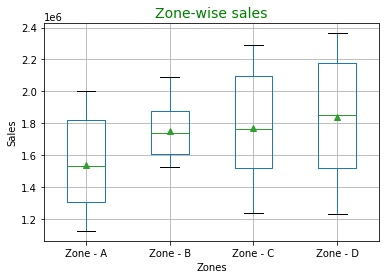

In [21]:
# Graphical representation
DF1 = DF.boxplot(showmeans= True)
DF1.set_title('Zone-wise sales', fontsize=14, color= 'green')
plt.xlabel('Zones')
plt.ylabel('Sales')

# 2. Total sales generated by all the zones for each month


In [22]:
DFMean = DF.sum(axis=1)
DFMean

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

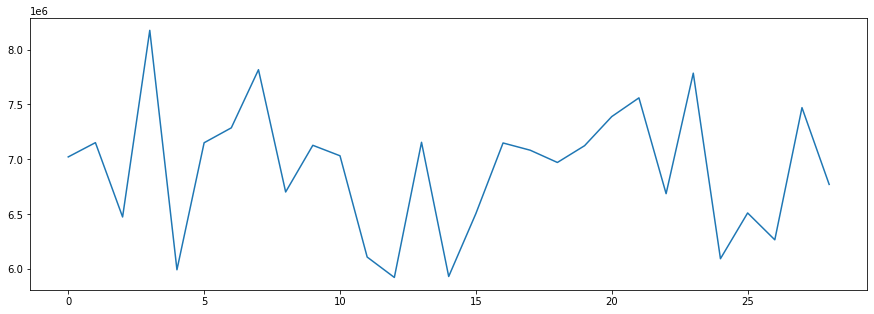

In [23]:
plt.figure(figsize=(15,5))
plt.plot(DFMean, scalex=True, scaley=True)

# 3. Check whether all the zones generate the same amount of sales

Hypotheses:

H0: All zones generate the same amount of sales

Ha: All zones wouldn't be able to generate the same amount of sales


In [25]:
alpha = 0.05

F_value, p_val = stats.f_oneway(DF['Zone - A'], DF['Zone - B'],DF['Zone - C'], DF['Zone - D'])
print("F Value = ", F_value, "\n" "P Value = ", p_val)

F Value =  5.672056106843581 
P Value =  0.0011827601694503335


Inference:

Since P-Value (0.0011827601694503335) is less than alpha (0.05), we fail to accept the null hypothesis (H0) and hence accepting the alternate hypothesis (Ha).

Conclusion:

According to our hypotheses testing, we can conclude that there is a significant amount of difference in the sales generated by each zones.